In [16]:
import numpy as np

real_armPose = np.matrix([[-0.020, -0.679], [-0.082, -0.599], [0.017, -0.495], [0.107, -0.607]])
real_objPose = np.matrix([[-0.013, -0.684], [-0.084, -0.607], [0.025, -0.508], [0.118, -0.611]])

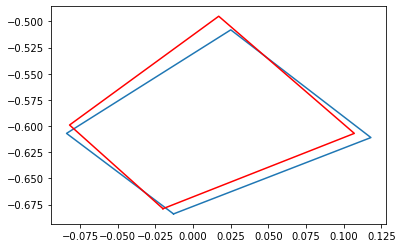

In [17]:
import matplotlib.pyplot as plt

x_arm = [real_armPose[0,0], real_armPose[1,0], real_armPose[2,0], real_armPose[3,0], real_armPose[0,0]]
y_arm = [real_armPose[0,1], real_armPose[1,1], real_armPose[2,1], real_armPose[3,1], real_armPose[0,1]]
x_obj = [real_objPose[0,0], real_objPose[1,0], real_objPose[2,0], real_objPose[3,0], real_objPose[0,0]]
y_obj = [real_objPose[0,1], real_objPose[1,1], real_objPose[2,1], real_objPose[3,1], real_objPose[0,1]]
plt.plot(x_obj, y_obj, x_arm, y_arm, 'r')

In [37]:
# 2 points(work!!), using obj_p1 and arm_p2
# A*obj=arm
# real_objPose = np.matrix([[-0.013, -0.684], [-0.084, -0.607]])
# real_armPose = np.matrix([[-0.020, -0.679], [-0.082, -0.599]])
real_obj = np.array([[-0.013, -0.684],[-0.084, -0.607]])


obj = np.array([
                [real_obj[0,0], real_obj[0,1], 0, 0], 
                [0, 0, real_obj[0,0], real_obj[0,1]],
                [real_obj[1,0], real_obj[1,1], 0, 0], 
                [0, 0, real_obj[1,0], real_obj[1,1]]])

b = np.array([-0.020, -0.679, -0.082, -0.599])
xx = np.linalg.solve(obj, b)
xx = np.array([xx[0:2], xx[2:4]]); print('Matrix:\n', xx)

Matrix:
 [[ 0.88667406  0.01238777]
 [-0.04916776  0.99362453]]


In [19]:
# real_arm_pose = np.dot(xx, real_objPose[0].transpose())

obj_65 = np.array([[-0.07007115541368558, -0.6100319893460383,1], [-0.08449584908594221, -0.6086930923296243,1]])
# real_obj = np.array([-0.013, -0.684, 1]).reshape(3,1)
obj_65 = obj_65[0, 0:2].reshape(2,1)
real_arm_pose = np.dot(xx, obj_65)
real_arm_pose

array([[-0.06968721],
       [-0.60269751]])

In [20]:
# 2 points(work!!), using arm_point1 and point2
# A*arm=obj 

arm = np.array([[-0.020, -0.679, 0, 0], 
              [0, 0, -0.020, -0.679], 
              [-0.082, -0.599, 0, 0], 
              [0, 0, -0.082, -0.599]])
b = np.array([-0.013, -0.684, -0.084, -0.607])
x = np.linalg.solve(arm, b)
x = np.array([x[0:2], x[2:4]]); print(x)
real_obj_pose = np.dot(x, real_armPose[0].transpose())
real_obj_pose

[[ 1.12703099 -0.01405099]
 [ 0.05576914  1.00572109]]


matrix([[-0.013],
        [-0.684]])

In [21]:
# using cv2-Affine Transformation(work, but nto pricise. it should be used in image?)
# !pip install ipynb cv2
import cv2
import numpy as np
from affine import Affine

In [22]:
# Input1:arm_pose from obj_65
# Input2
# Output:arm_calibration 




In [23]:

  
pts_arm = np.float32([[-0.020, -0.679], 
                      [-0.082, -0.599],
                      [0.017, -0.495]])

pts_obj = np.float32([[-0.013, -0.684],
                      [-0.084, -0.607], 
                      [0.025, -0.508]])

M = cv2.getAffineTransform(pts_arm, pts_obj)
print(M)

# # real_data:
# # realArm-1
# # ('object_65:', [-0.07007115541368558, -0.6100319893460383])
# # - Translation: [-0.020, -0.679, 0.018]
# # - Rotation: in Quaternion [0.031, 0.997, 0.065, -0.026]
# # realArm-2
# # ('object_65:', [-0.08449584908594221, -0.6086930923296243, 0.0015215875564607018])
# # - Translation: [-0.047, -0.591, -0.019]
# # - Rotation: in Quaternion [0.078, 0.993, 0.084, 0.026]

obj_65 = np.array([[ 0.02466197,-0.64561468,1], [-0.01160672,-0.59342774,1]])
# obj_pose = np.array([-0.013, -0.684, 1]).reshape(3,1)
obj_65 = obj_65[0].reshape(3,1)
Input2 = np.dot(M, obj_65)
Input2 = np.array([[ 0.03642851],
                   [-0.65229863],
                   [1]])
output = np.dot(M, Input2)
output

[[ 1.12082399 -0.01886134 -0.00339037]
 [-0.00612456  0.95775322 -0.03380805]]


array([[ 0.0497428 ],
       [-0.65877227]])

In [ ]:
# -------------------------------------------------------

In [ ]:
# 2 points(work!!), using point1 and point3

In [ ]:
A3 = np.array([[-0.020, -0.679, 0, 0], 
              [0, 0, -0.020, -0.679], 
              [0.017, -0.495, 0, 0], 
              [0, 0, 0.017, -0.495]])
b3 = np.array([-0.013, -0.684, 0.025, -0.508])
x3 = np.linalg.solve(A3, b3)
x3 = np.array([x3[0:2], x3[2:4]]); print(x3)
real_obj = np.dot(x3, arm[3].transpose())
real_obj

In [ ]:
# 2 points

In [ ]:
A4 = np.array([[0, 0, 0, 0], 
               [0, 0, 0, 0], 
               [0, 0, 0, 0], 
               [0, 0, 0, 0]])

b4 = np.array([-0.013, -0.684, -0.084, -0.607])
x4 = np.linalg.solve(A4, b4)
x4 = np.array([x4[0:2], x4[2:4]]); print(x4)
real_obj = np.dot(x4, arm[0].transpose())
real_obj

In [ ]:
# 4 points (doesn't work)

arm = np.matrix([[-0.020, -0.679], [-0.082, -0.599], [0.017, -0.495], [0.107, -0.607]])
obj = np.matrix([[-0.013, -0.684], [-0.084, -0.607], [0.025, -0.508], [0.118, -0.611]])

A1 = np.zeros((8, 8))
A1[0,0:2]=arm[0]
A1[1,2:4]=arm[0]
A1[2,4:6]=arm[0]
A1[3,6:8]=arm[0]

A1[2,0:2]=arm[1]
A1[3,2:4]=arm[1]
A1[4,4:6]=arm[1]
A1[5,6:8]=arm[1]

A1[4,0:2]=arm[2]
A1[5,2:4]=arm[2]
A1[6,4:6]=arm[2]
A1[7,6:8]=arm[2]

A1[6,0:2]=arm[3]
A1[7,2:4]=arm[3]
A1[0,4:6]=arm[3]
A1[1,6:8]=arm[3]

A1

In [ ]:
b1 = np.array([-0.013, -0.684, -0.084, -0.607, 0.025, -0.508, 0.118, -0.611])
x1 = np.linalg.solve(A1, b1)
x1 = np.array([x1[0:2], x1[2:4], x1[4:6], x1[6:8]])
x1

In [ ]:
real_obj = np.dot(x1, arm[1].transpose())
real_obj

In [ ]:
# 4 points (doesn't work)
# arm = np.matrix([[-0.020, -0.679], [-0.082, -0.599], [0.017, -0.495], [0.107, -0.607]])
# obj = np.matrix([[-0.013, -0.684], [-0.084, -0.607], [0.025, -0.508], [0.118, -0.611]])

In [ ]:
# 4 points A=arm position
A2 = np.array([[0, 0, 0, 0], 
               [0, 0, 0, 0], 
               [0, 0, 0, 0], 
               [0, 0, 0, 0]])

b2 = np.array([-0.013, -0.684, -0.084, -0.607])
x2 = np.linalg.solve(A2, b2)
x2 = np.array([x2[0:2], x2[2:4]])
x2.shape

In [ ]:
real_obj = np.dot(x2, arm[0].transpose())
real_obj

In [15]:
# using cv2-Affine Transformation(work, but nto pricise. it should be used in image?)
# !pip install ipynb cv2
import cv2
import numpy as np
from affine import Affine

# Input:obj; 
# Output: arm
  
pts_obj = np.float32([[-0.013, -0.684],
                      [-0.084, -0.607], 
                      [0.025, -0.508]])

pts_arm = np.float32([[-0.020, -0.679], 
                      [-0.082, -0.599],
                      [0.017, -0.495]])
  
M = cv2.getAffineTransform(pts_obj, pts_arm); print('Matrix:', M)

# real_data from experiment:



obj_65 = np.array([[-0.01892093,-0.58677264,1]])
obj_65 = obj_65[0].reshape(3,1)
real_arm_pose = np.dot(M, obj_65)
real_arm_pose
# jupterNotebook: array([[-0.02357472],[-0.57750678]])
# ROS: ('real_arm_pose:', array([[-0.02713275],[-0.61223127]]))
# MoveIt!:
# - Translation: [-0.029, -0.603, 0.029]
# - Rotation: in Quaternion [0.007, 0.997, 0.071, -0.034]


Matrix: [[0.89229677 0.01757229 0.0036193 ]
 [0.00570599 1.04422266 0.03532248]]


array([[-0.02357472],
       [-0.57750678]])

In [ ]:
# using cv2-Perspective Transformation (can get matrix, but nto pricise)

pts_obj = np.float32([[-0.013, -0.684],
                      [-0.084, -0.607], 
                      [0.025, -0.508], 
                      [0.118, -0.611]])

pts_arm = np.float32([[-0.020, -0.679], 
                      [-0.082, -0.599],
                      [0.017, -0.495],
                      [0.107, -0.607]])
  
M = cv2.getPerspectiveTransform(pts_obj,pts_arm)
M

In [ ]:
# ('object_65:', [-0.07007115541368558, -0.6100319893460383])
# - Translation: [-0.020, -0.679, 0.018]

In [ ]:
obj_65 = np.array([[-0.07007115541368558, -0.6100319893460383,1], [-0.08449584908594221, -0.6086930923296243,1]])
# real_obj = np.array([-0.013, -0.684, 1]).reshape(3,1)
real_obj = obj_65[0].reshape(3,1)
real_arm = np.dot(M, real_obj)
real_arm

In [ ]:
# testing with exeperiment.

In [ ]:
# method 4 (deosn't work)
# arm = np.matrix([[-0.020, -0.679], [-0.082, -0.599], [0.017, -0.495], [0.107, -0.607]])
# obj = np.matrix([[-0.013, -0.684], [-0.084, -0.607], [0.025, -0.508], [0.118, -0.611]])

In [ ]:
diff1 = arm[0]-obj[0]
diff1

In [ ]:
diff2 = arm[1]-obj[1]
diff2

In [ ]:
diff3 = arm[2]-obj[2]
diff3

In [ ]:
diff4 = arm[3]-obj[3]
diff4